In [5]:
import requests
import json
import pandas
import numpy
import datetime
import time
import os

cookie = ""

while True:
    os.system('clear')
    url = "https://www.invertironline.com/Titulo/GraficoIntradiario?idTitulo=3445&idTipo=4&idMercado=1"
    
    headers = {
    'Host':'www.invertironline.com',
    'User-Agent':'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:66.0) Gecko/20100101 Firefox/66.0',
    'Accept':'application/json, text/javascript, */*; q=0.01',
    "Accept-Language":"es-AR,es;q=0.8,en-US;q=0.5,en;q=0.3",
    'Accept-Encoding':'gzip, deflate, br',
    'Referer':'https://www.invertironline.com/titulo/cotizacion/BCBA/GGAL/GRUPO-FINANCIERO-GALICIA/',
    'X-Requested-With':'XMLHttpRequest',
    'Connection':'keep-alive',
    'Cookie':cookie
    }


    r = requests.get(url=url, headers=headers)

    datos = json.loads(r.text) #transformamos el json recibido en r a un tipo de dato nativo
                            #  en python, en este caso una lista.
    hora = []
    precio = []
    volumen = []
    for e in datos:
        h = datetime.datetime.utcfromtimestamp(int(e['FechaHora'])).strftime('%Y-%m-%d %H:%M:%S')
        hora.append(h)
        precio.append(e['Ultima'])
        volumen.append(e['CantidadNominal'])
    preplanilla = {}
    preplanilla["precio"],preplanilla["volumen"] = precio,volumen
    planilla = pandas.DataFrame(preplanilla, columns=["precio","volumen"],index=hora)
    print("Ultimas operaciones\n")
    print(planilla.tail())
    time.sleep(10)
    break
    

Ultimas operaciones

                     precio    volumen
2019-04-16 16:59:40  110.90       10.0
2019-04-16 16:59:51  110.90       10.0
2019-04-16 16:59:54  110.80      242.0
2019-04-16 16:59:54  110.85      200.0
2019-04-16 17:00:04  110.80  2043145.0


In [6]:
planilla.describe()


,precio,volumen
count,935.000000,9.350000e+02
mean,111.668449,4.165298e+03
std,0.913320,6.684609e+04
min,110.500000,1.000000e+00
25%,111.000000,1.000000e+02
50%,111.350000,5.000000e+02
75%,112.200000,2.172500e+03
max,114.400000,2.043145e+06


/home/rock/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


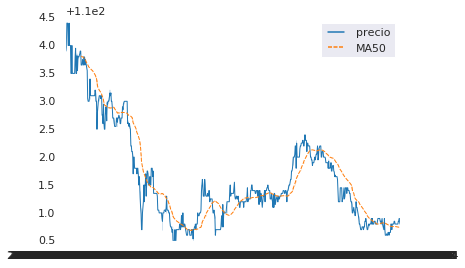

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
plt.style.use('classic')

media = planilla
media = media.drop(['volumen'], axis=1)
sb.set()
graf = sb.lineplot(data=media, palette="tab10", linewidth=1)

In [23]:
planilla["MA50"] = planilla['precio'].rolling(50).mean()

In [24]:
planilla


,precio,volumen,MA50
2019-04-16 11:00:27,113.90,100.0,NaN
2019-04-16 11:00:27,113.90,120.0,NaN
2019-04-16 11:00:27,113.90,10.0,NaN
2019-04-16 11:00:27,113.90,45.0,NaN
2019-04-16 11:00:27,113.90,100.0,NaN
2019-04-16 11:00:28,113.90,10000.0,NaN
2019-04-16 11:00:29,114.00,17.0,NaN
2019-04-16 11:00:29,114.00,72.0,NaN
2019-04-16 11:00:29,114.00,45.0,NaN
2019-04-16 11:00:29,113.90,730.0,NaN
